In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [103]:
from sklearn.datasets import load_iris
iris = load_iris()

In [104]:
X = iris.data # data colomns from the iris dataset
Y = iris.target #target colomn from the iris dataset

In [105]:
iris_Type = iris.target_names

### **Logistic Regression**

In [106]:

from sklearn.linear_model import LogisticRegression
logsRegs = LogisticRegression(solver='lbfgs',max_iter=(len(Y)+1))
logsRegs.fit(X,Y)
iris_Type[logsRegs.predict(X)]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

In [107]:
tempRegressionPredict = logsRegs.predict(X)

In [108]:
len(tempRegressionPredict)

150

# **Accuracy check of the training data**


- training accuracy

In [109]:
from sklearn import metrics
metrics.accuracy_score(Y, tempRegressionPredict)  # 150 given data vs 150 predicted data

0.9733333333333334

# **KNN at n = 5**

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knnClass_5 = KNeighborsClassifier(n_neighbors=5)
knnClass_5.fit(X,Y)
tempKnnPredict_5 = knnClass_5.predict(X)

In [111]:
metrics.accuracy_score(Y,tempKnnPredict_5)

0.9666666666666667

# **KNN at n = 1**

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knnClass_1 = KNeighborsClassifier(n_neighbors=1)
knnClass_1.fit(X,Y)
tempKnnPredict_1 = knnClass_1.predict(X)

In [113]:
metrics.accuracy_score(Y,tempKnnPredict_1)
# this data is overfitting as it accuracy is 1

1.0

# **So train test split is done**

In [114]:
X.shape
Y.shape

(150,)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train ,Y_test = train_test_split(X,Y, train_size=.4, random_state = 1)

# this is how the data is splitted in X and Y

In [116]:
Y_train.shape

(60,)

# **fit on the training data**

In [117]:
#Logistic Regression

logsRegs = LogisticRegression()
logsRegs.fit(X_train,Y_train)
tempRegressionTest = logsRegs.predict(X_test)
metrics.accuracy_score(Y_test,tempRegressionTest)

0.9666666666666667

In [118]:
# KNN , n = 5

knnClassTest = KNeighborsClassifier(n_neighbors=5)
knnClassTest.fit(X_train,Y_train)
tempKNNTest_5 = knnClassTest.predict(X_test)
metrics.accuracy_score(Y_test,tempKNNTest_5)

0.9777777777777777

In [119]:
# KNN , n = 1

knnClassTest = KNeighborsClassifier(n_neighbors=1)
knnClassTest.fit(X_train,Y_train)
tempKNNTest_1 = knnClassTest.predict(X_test)
metrics.accuracy_score(Y_test,tempKNNTest_1)

0.9333333333333333

# **Is even better value of K possible?**

In [120]:
#lets make KNN accuracy a function

def knn_Accu(i):
  knnClassTest = KNeighborsClassifier(n_neighbors=i)
  knnClassTest.fit(X_train,Y_train)
  tmpKnnTst = knnClassTest.predict(X_test)
  accu = metrics.accuracy_score(Y_test,tmpKnnTst)

  return accu

In [130]:
tmp = np.arange(1,26)
accu_list = []
for i in tmp:
  accu_list.append(knn_Accu(i))

Text(0, 0.5, 'Accuracy Score')

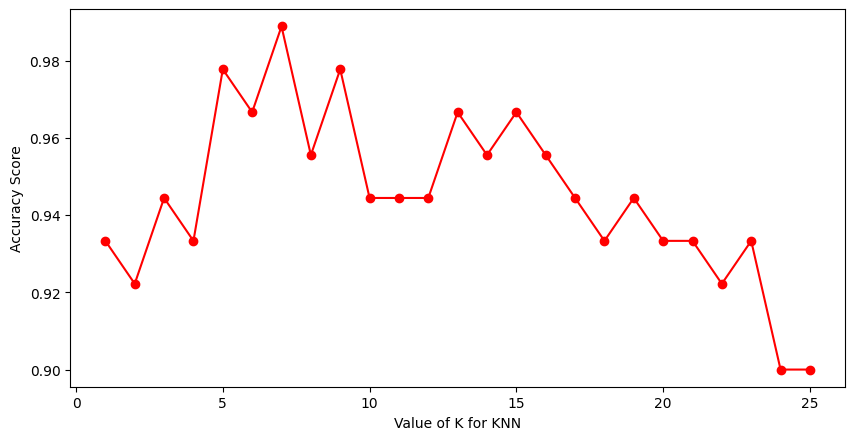

In [142]:
from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=100)
plt.plot(tmp,accu_list, '-or')
plt.xlabel("Value of K for KNN")
plt.ylabel("Accuracy Score")

In [143]:
accu_list

[0.9333333333333333,
 0.9222222222222223,
 0.9444444444444444,
 0.9333333333333333,
 0.9777777777777777,
 0.9666666666666667,
 0.9888888888888889,
 0.9555555555555556,
 0.9777777777777777,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9666666666666667,
 0.9555555555555556,
 0.9666666666666667,
 0.9555555555555556,
 0.9444444444444444,
 0.9333333333333333,
 0.9444444444444444,
 0.9333333333333333,
 0.9333333333333333,
 0.9222222222222223,
 0.9333333333333333,
 0.9,
 0.9]

In [144]:
knn_Accu(7)

0.9888888888888889

# however K fold cross validation can overcome the limitations of the KNN method